In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from ipywidgets import Dropdown, FloatSlider, IntSlider, interact
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge  # noqa F401
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import make_pipeline

In [3]:
df=pd.read_csv(r"C:\Users\Sahil\OneDrive\Desktop\New folder (5)\Downloads\Bengaluru_House_Data.csv")

In [4]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [6]:
df['availability'].value_counts()

availability
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: count, Length: 81, dtype: int64

In [7]:
df['area_type'].value_counts()

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64

<Axes: >

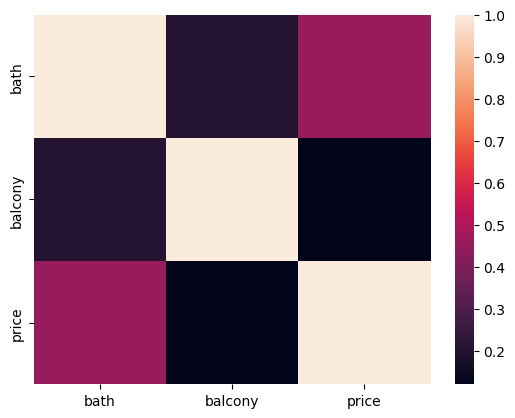

In [8]:
#corelation between two columns that are related to each other.The similar columns are deleted.
corr=df.select_dtypes("number").corr()
sns.heatmap(corr)

In [9]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [10]:
df1=df.drop(columns =['area_type','society','balcony','availability'])

In [11]:
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13319 non-null  object 
 1   size        13304 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13247 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [12]:
df1.dropna(inplace=True)

In [13]:
df1.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [14]:
df1['size'].unique() # Identified the unique value in size columns

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [15]:
df1.info()


<class 'pandas.core.frame.DataFrame'>
Index: 13246 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13246 non-null  object 
 1   size        13246 non-null  object 
 2   total_sqft  13246 non-null  object 
 3   bath        13246 non-null  float64
 4   price       13246 non-null  float64
dtypes: float64(2), object(3)
memory usage: 620.9+ KB


In [16]:
df1['bedrooms'] = df1['size'].apply(lambda x: int(x.split(' ')[0]))


In [17]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13246 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13246 non-null  object 
 1   size        13246 non-null  object 
 2   total_sqft  13246 non-null  object 
 3   bath        13246 non-null  float64
 4   price       13246 non-null  float64
 5   bedrooms    13246 non-null  int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 724.4+ KB


In [18]:
df1.head()


,location,size,total_sqft,bath,price,bedrooms
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [19]:
df1['bedrooms'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [20]:
df1[df1.bedrooms>20]      # kis ke 20 se zada bedroom hain  

,location,size,total_sqft,bath,price,bedrooms
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [21]:
df1['total_sqft'].unique()#integer is leye nhi hain kuy ki isme me kuch values range me lekhi hain

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [22]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13246 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13246 non-null  object 
 1   size        13246 non-null  object 
 2   total_sqft  13246 non-null  object 
 3   bath        13246 non-null  float64
 4   price       13246 non-null  float64
 5   bedrooms    13246 non-null  int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 724.4+ KB


In [23]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [24]:
df1[~df1['total_sqft'].apply(is_float)].head(30)

,location,size,total_sqft,bath,price,bedrooms
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [25]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [26]:
df4 = df1.copy()
df4.total_sqft = df4.total_sqft.apply(convert_sqft_to_num)
df4.dropna(inplace=True)

df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13200 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13200 non-null  object 
 1   size        13200 non-null  object 
 2   total_sqft  13200 non-null  float64
 3   bath        13200 non-null  float64
 4   price       13200 non-null  float64
 5   bedrooms    13200 non-null  int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 721.9+ KB


In [27]:
#outliers are the jo hamre data se alga values hoti hain outlier ka box bana hota hai


{'whiskers': [<matplotlib.lines.Line2D at 0x21d3469c990>,
 'caps': [<matplotlib.lines.Line2D at 0x21d34768310>,
 'boxes': [<matplotlib.lines.Line2D at 0x21d34775e50>],
 'medians': [<matplotlib.lines.Line2D at 0x21d347698d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x21d3476a410>],
 'means': []}

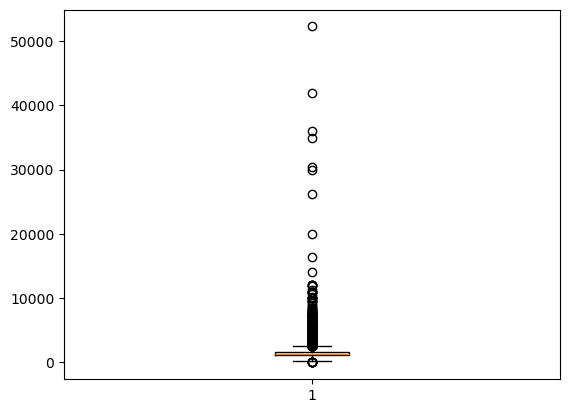

In [28]:
plt.boxplot(df4['total_sqft'])

In [29]:
#20%-75% in the orange line 

In [30]:
df4['total_sqft'].describe()

count    13200.000000
mean      1555.302783
std       1237.323445
min          1.000000
25%       1100.000000
50%       1275.000000
75%       1672.000000
max      52272.000000
Name: total_sqft, dtype: float64

In [31]:
#quatile ek funtion hota hai jo data ko quatile me convert kar deta hai in general most of the case outlier are lie at top and bottom 
low,high =df4["total_sqft"].quantile([0.1,0.9])
mask_area=df4["total_sqft"].between(low,high)
df4=df4[mask_area]

{'whiskers': [<matplotlib.lines.Line2D at 0x21d347d3750>,
 'caps': [<matplotlib.lines.Line2D at 0x21d347d9050>,
 'boxes': [<matplotlib.lines.Line2D at 0x21d347d2b90>],
 'medians': [<matplotlib.lines.Line2D at 0x21d347da690>],
 'fliers': [<matplotlib.lines.Line2D at 0x21d347db210>],
 'means': []}

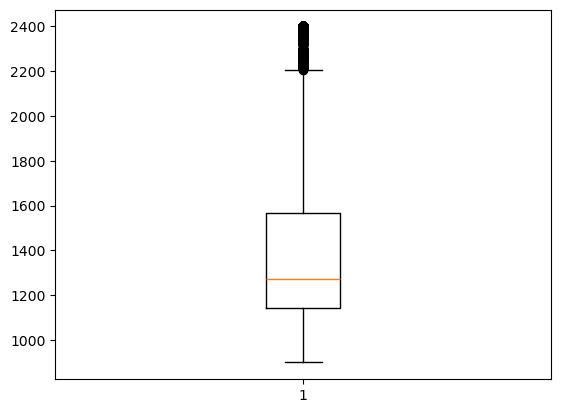

In [32]:
plt.boxplot(df4["total_sqft"])

{'whiskers': [<matplotlib.lines.Line2D at 0x21d3586cc90>,
 'caps': [<matplotlib.lines.Line2D at 0x21d3586e410>,
 'boxes': [<matplotlib.lines.Line2D at 0x21d3586c0d0>],
 'medians': [<matplotlib.lines.Line2D at 0x21d3586f8d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x21d35870310>],
 'means': []}

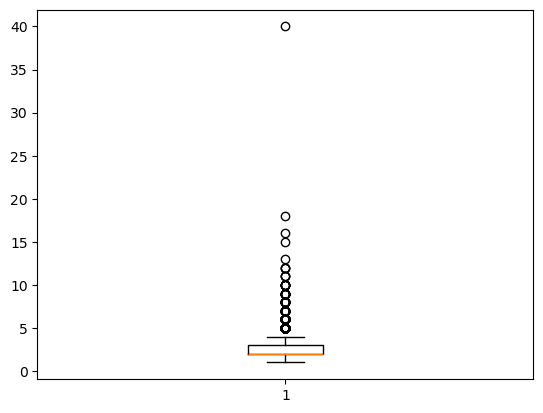

In [33]:
plt.boxplot(df4['bath'])

In [34]:
df4=df4[df4['bath']<12]

In [35]:
df4['bath'].value_counts()

bath
2.0     6468
3.0     2933
4.0      632
5.0      190
1.0      135
6.0      117
7.0       46
8.0       31
9.0       22
10.0       9
11.0       3
Name: count, dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x21d358d5990>,
 'caps': [<matplotlib.lines.Line2D at 0x21d358d7350>,
 'boxes': [<matplotlib.lines.Line2D at 0x21d358a5150>],
 'medians': [<matplotlib.lines.Line2D at 0x21d358e09d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x21d358e1590>],
 'means': []}

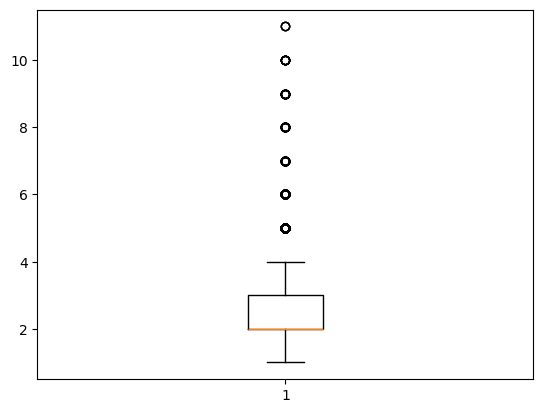

In [36]:
plt.boxplot(df4['bath'])

In [37]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10586 entries, 0 to 13317
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    10586 non-null  object 
 1   size        10586 non-null  object 
 2   total_sqft  10586 non-null  float64
 3   bath        10586 non-null  float64
 4   price       10586 non-null  float64
 5   bedrooms    10586 non-null  int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 578.9+ KB


In [38]:
df4.head()

,location,size,total_sqft,bath,price,bedrooms
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
5,Whitefield,2 BHK,1170.0,2.0,38.00,2


In [39]:
df4=df4.drop(columns='size')

In [40]:
df4.head()

,location,total_sqft,bath,price,bedrooms
0,Electronic City Phase II,1056.0,2.0,39.07,2
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2
5,Whitefield,1170.0,2.0,38.00,2


In [41]:
df4['price per sqft']=df4['price']*100000/df4['total_sqft']

In [42]:
df4.head()

,location,total_sqft,bath,price,bedrooms,price per sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,1170.0,2.0,38.00,2,3247.863248


In [43]:
df4['price per sqft'].describe()

count    10586.000000
mean      6244.315309
std       3698.326765
min        500.000000
25%       4206.709513
50%       5252.421226
75%       6761.335502
max      53150.000000
Name: price per sqft, dtype: float64

In [44]:
low,high =df4["price per sqft"].quantile([0.1,0.9])
mask_area=df4["price per sqft"].between(low,high)
df4=df4[mask_area]

{'whiskers': [<matplotlib.lines.Line2D at 0x21d3593f1d0>,
 'caps': [<matplotlib.lines.Line2D at 0x21d35944b90>,
 'boxes': [<matplotlib.lines.Line2D at 0x21d347f2a90>],
 'medians': [<matplotlib.lines.Line2D at 0x21d35946190>],
 'fliers': [<matplotlib.lines.Line2D at 0x21d35946cd0>],
 'means': []}

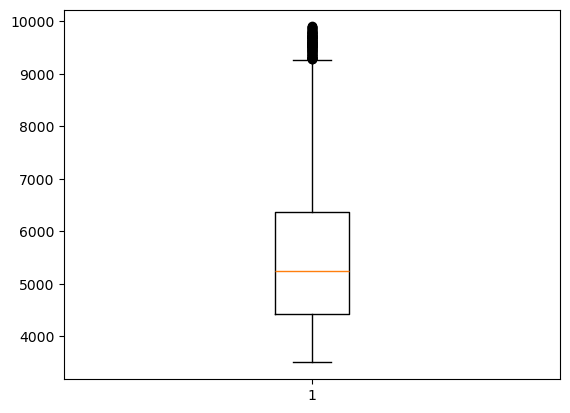

In [45]:
plt.boxplot(df4["price per sqft"])

In [46]:
df4.location=df4.location.apply(lambda x: x.strip())
location_stats=df4['location'].value_counts(ascending=False)
location_stats
                                            


location
Whitefield               355
Sarjapur  Road           293
Kanakpura Road           205
Thanisandra              189
Electronic City          167
                        ... 
3rd Block Koramangala      1
Rainbow Drive              1
Kalkere Channasandra       1
Marasandra                 1
Annaiah Reddy Layout       1
Name: count, Length: 934, dtype: int64

In [47]:
location_stats_less_than_10=location_stats[location_stats<=10]
len(location_stats_less_than_10)

765

In [48]:
df4.location.nunique()

934

In [49]:
df4.location=df4.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df4.location.unique())

170

In [50]:
df4.head(10)

,location,total_sqft,bath,price,bedrooms,price per sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000
8,Marathahalli,1310.0,3.0,63.25,3,4828.244275
10,Whitefield,1800.0,2.0,70.00,3,3888.888889
12,7th Phase JP Nagar,1000.0,2.0,38.00,2,3800.000000
13,Gottigere,1100.0,2.0,40.00,2,3636.363636
14,Sarjapur,2250.0,3.0,148.00,3,6577.777778
15,Mysore Road,1175.0,2.0,73.50,2,6255.319149


In [51]:
df4=df4.drop(columns ='price per sqft')

In [52]:
df4.head()

,location,total_sqft,bath,price,bedrooms
0,Electronic City Phase II,1056.0,2.0,39.07,2
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2
8,Marathahalli,1310.0,3.0,63.25,3


In [53]:
#How to encode text columns data into 0 and 1 y is in outout x is input
x= df4.drop(['price'],axis='columns')
y=df4.price

In [65]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8468 entries, 0 to 13317
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    8468 non-null   object 
 1   total_sqft  8468 non-null   float64
 2   bath        8468 non-null   float64
 3   bedrooms    8468 non-null   int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 330.8+ KB


In [54]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [55]:
model=make_pipeline(
    OneHotEncoder(),
    LinearRegression()
)
model.fit(x_train,y_train)

Pipeline(steps=[('onehotencoder', OneHotEncoder()),
                ('linearregression', LinearRegression())])

In [56]:

y_pred=model.predict(x_train)
mae=mean_absolute_error(y_train,y_pred)

In [57]:
mae

10.345420528714001

In [58]:
from sklearn.metrics import mean_absolute_percentage_error as error
mae=error(y_train,y_pred)
mae

0.13894847852239775

In [59]:
def make_prediction(location,total_sqft, bath, bedrooms):
    data={
        "location": location,
        "total_sqft": total_sqft,
        "bath": bath,
        "bedrooms": bedrooms

    }
    df = pd.DataFrame(data, index=[0])

    prediction = model.predict(df)
    return f"Predicted apartment price: {prediction}"

In [67]:

from ipywidgets import Dropdown, FloatSlider, IntSlider, interact
interact(
    make_prediction,
    location=Dropdown(options=sorted(x_train["location"].unique())),
    total_sqft=IntSlider(
        min=x_train["total_sqft"].min(),
        max=x_train["total_sqft"].max(),
        value=x_train["total_sqft"].mean(),
    ),
    bath=IntSlider(
        min=x_train["bath"].min(),
        max=x_train["bath"].max(),

        value=x_train["bath"].mean(),
    ),
    bedrooms=IntSlider(
        min=x_train["bedrooms"].min(),
        max=x_train["bedrooms"].max(),

        value=x_train["bedrooms"].mean(),
    ),
    
);

interactive(children=(Dropdown(description='location', options=('1st Phase JP Nagar', '5th Phase JP Nagar', '6…